In [1]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
import pickle

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
with open('Input/gap_29.pkl', 'rb') as file:
    x = pickle.load(file)
x_ = pd.DataFrame(x)
with open('Input/EnergyGap.pkl', 'rb') as file:
    y = pickle.load(file)
y = np.array(y).reshape(-1, 1).ravel()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

model = xgb.XGBRegressor(gamma= 0.000123129, learning_rate=0.032845274,max_depth=8,min_child_weight= 2,n_estimators= 293, random_state=42)
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

y_test_pred = model.predict(x_test)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

y_val_pred = model.predict(x_val)
r2_val = r2_score(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)

print("train R2:", r2_train)
print("test R2:", r2_test)
print("validation R2:", r2_val)
print("train MAE", mae_train)
print("test MAE", mae_test)
print("validation MAE", mae_val)

train R2: 0.9797524809837341
test R2: 0.9449673891067505
validation R2: 0.9437623620033264
train MAE 0.0046338034
test MAE 0.0074138567
validation MAE 0.0073562837


In [3]:
explainer = shap.TreeExplainer(model)
shap_values_train = explainer(x_train)
shap_values_test = explainer(x_test)

[13:01:40] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


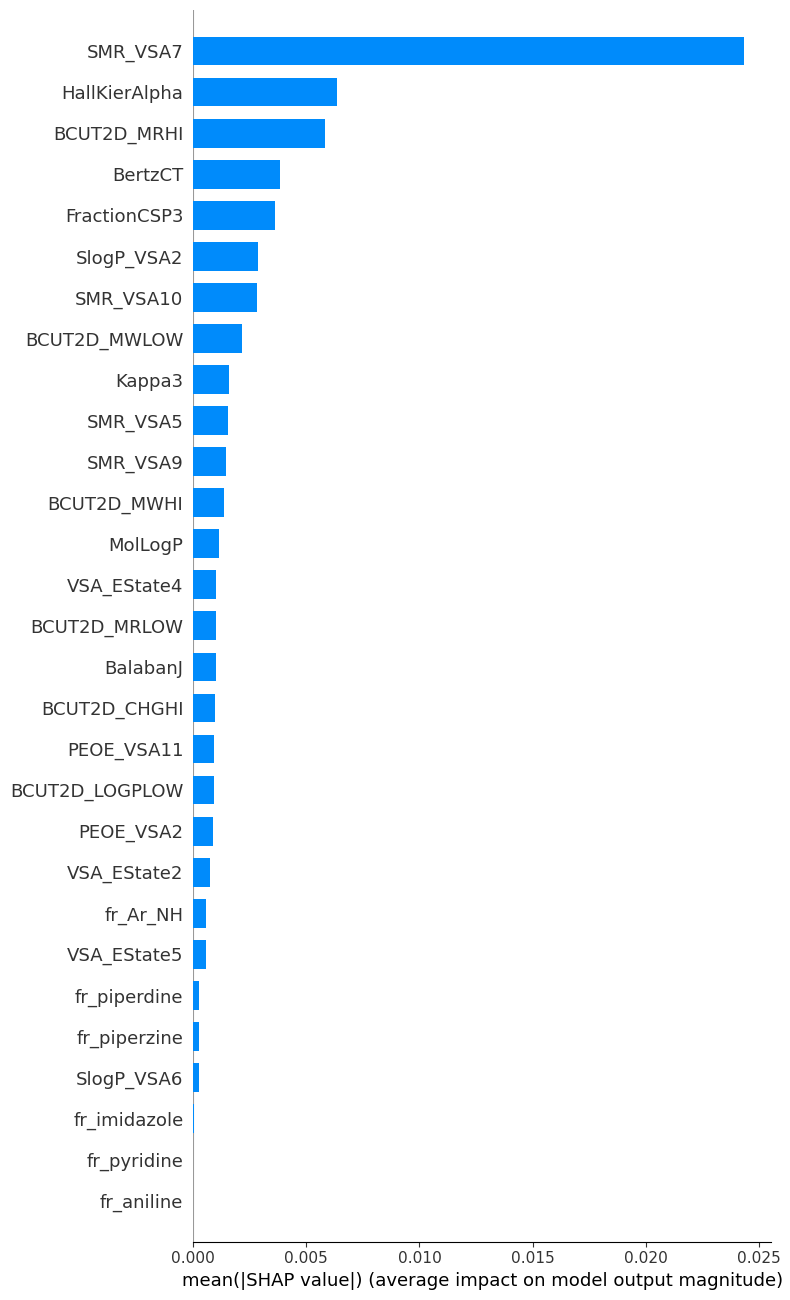

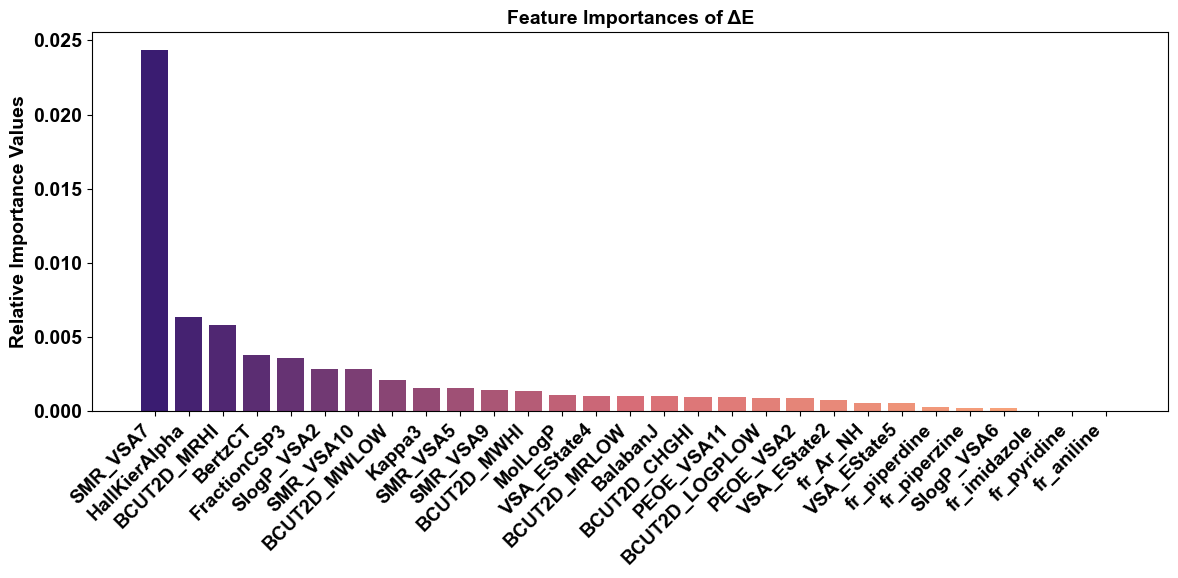

In [4]:
import matplotlib.colors as mcolors

shap.summary_plot(shap_values_train, x_train, plot_type="bar", title='Train', max_display=30, show=False)

# Get current axis
ax = plt.gca()

# Extract labels and values from the plot
labels = [l.get_text() for l in ax.get_yticklabels()]
values = [rect.get_width() for rect in ax.patches]

# Create a DataFrame for features and their importance values
df_feature = pd.DataFrame({'Labels': labels, 'Values': values})
df_feature = df_feature.sort_values(by='Values', ascending=False)


colors = ["#3A1C71","#D76D77","#FFAF7B"]
cmap = mcolors.LinearSegmentedColormap.from_list("custom_gradient", colors)

# Set global font size
plt.rc('font', size=14)

# Create a figure for the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(df_feature['Labels'], df_feature['Values'], color=cmap(np.linspace(0, 1, len(df_feature))), align='center')

# Customize x-ticks
plt.xticks(
    ticks=np.arange(len(df_feature)),
    labels=df_feature['Labels'],
    rotation=45,
    ha='right',
    fontsize=14,
    fontproperties='Arial',
    fontweight='bold'
)

# Labeling the axes and title
plt.ylabel('Relative Importance Values', fontsize=14, fontproperties='Arial', fontweight='bold')
#plt.xlabel('Features', fontsize=14, fontproperties='Arial', fontweight='bold')
plt.title('Feature Importances of ΔE', fontsize=14, fontproperties='Arial', fontweight='bold')

# Customize y-ticks
plt.yticks(fontsize=14, fontproperties='Arial', fontweight='bold')

# Adjust layout and save the figure
plt.tight_layout()
#plt.savefig('gap_importance.tiff', dpi=600, format='tiff')

# Show the plot
plt.show()

In [5]:
df_feature

,Labels,Values
28,SMR_VSA7,0.024333
27,HallKierAlpha,0.006371
26,BCUT2D_MRHI,0.005836
25,BertzCT,0.003821
24,FractionCSP3,0.003626
23,SlogP_VSA2,0.002881
22,SMR_VSA10,0.002823
21,BCUT2D_MWLOW,0.002148
20,Kappa3,0.001603
19,SMR_VSA5,0.001559


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


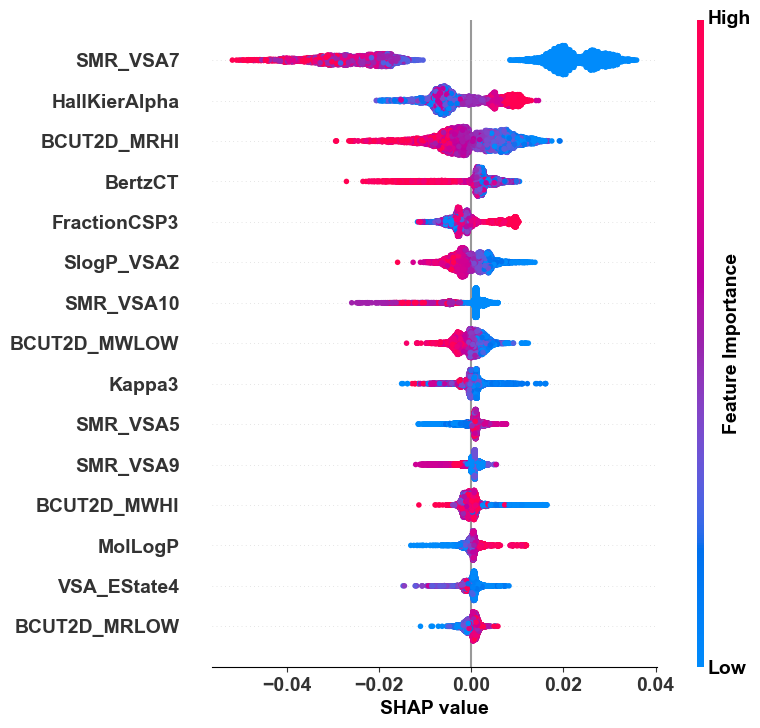

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


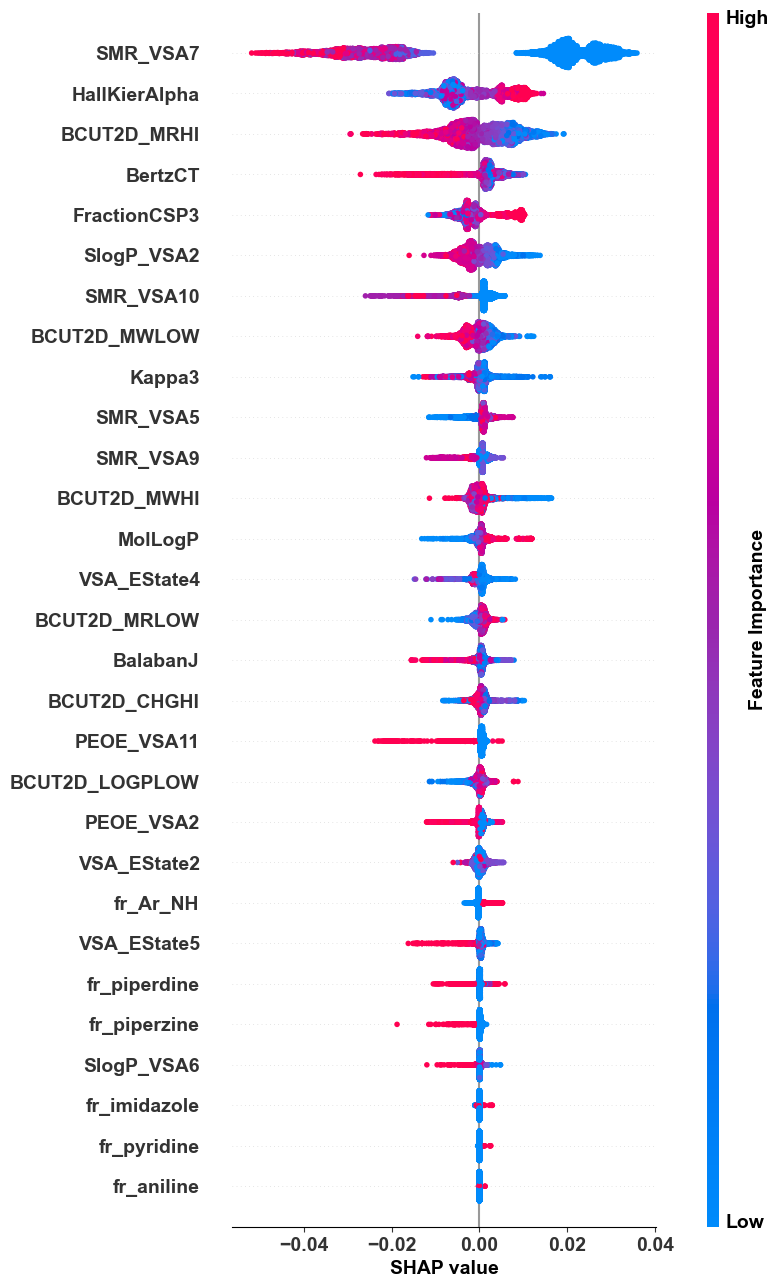

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


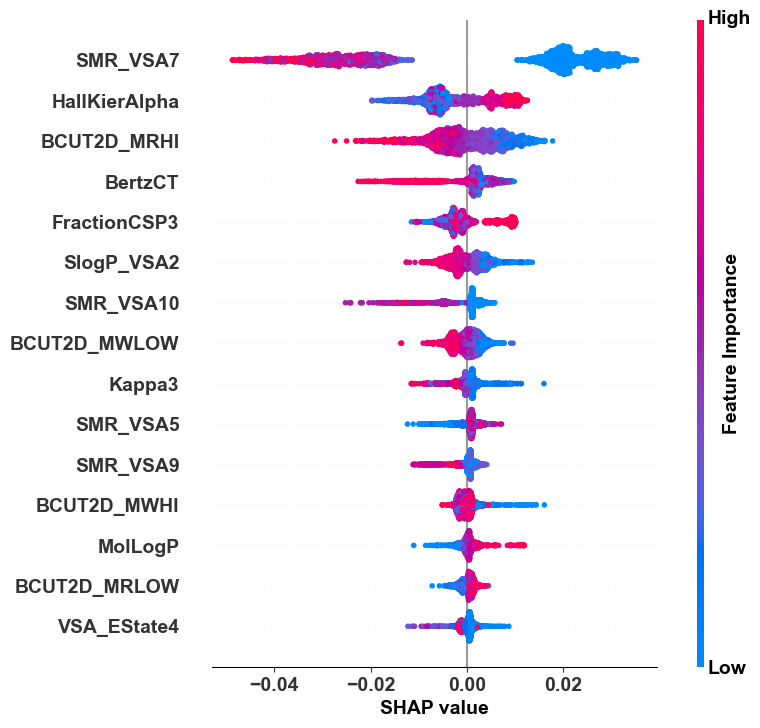

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


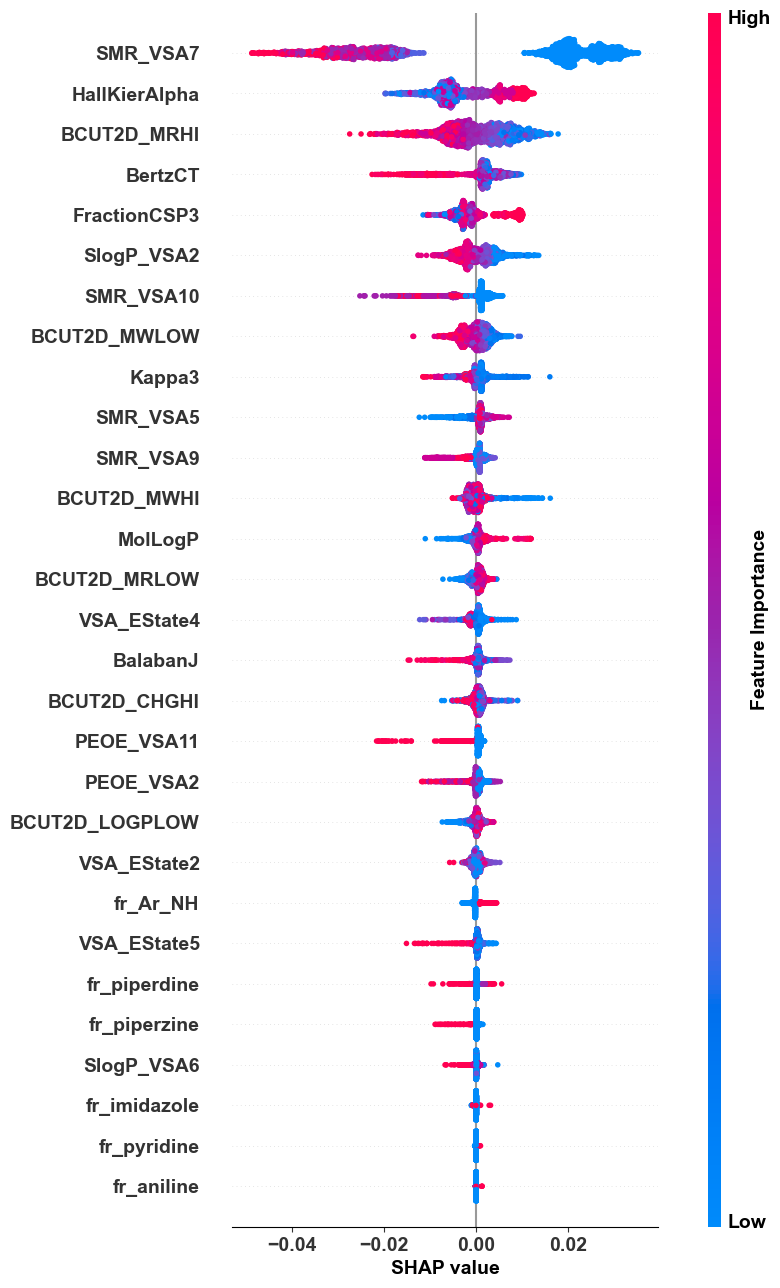

In [6]:
def plot_shap_summary(shap_values, X, max_display, filename):
    shap.initjs()
    ax = shap.summary_plot(shap_values, X, max_display=max_display, show=False, color_bar=False)

    font1 = {'family': 'Arial', 'weight': 'bold', 'size': 14}
    plt.rc('font', family='Arial')
    plt.rcParams.update({'font.size': 14})

    plt.tight_layout()
    plt.xticks(fontproperties='Arial', fontweight='bold', fontsize=14)
    plt.yticks(fontproperties='Arial', fontweight='bold', fontsize=14)
    plt.xlabel('SHAP value', fontdict=font1)

    cb = plt.colorbar(ax)
    cb.set_label('Feature Importance', fontproperties='Arial', fontsize=14, weight='bold')
    cb.outline.set_visible(False)
    cb.ax.set_aspect(4)
    cb.set_ticks([])

    cb.ax.text(1.5, 23.5, 'High', va='bottom', fontsize=14, fontweight='bold')
    cb.ax.text(1.5, 0.25, 'Low', va='top', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.savefig(filename, dpi=600, format='tiff')
    plt.show()


plot_shap_summary(shap_values_train, x_train, max_display=15, filename='Output/gap_shap_train_15.tiff')
plot_shap_summary(shap_values_train, x_train, max_display=29, filename='Output/gap_shap_train_29.tiff')
plot_shap_summary(shap_values_test, x_test, max_display=15, filename='Output/gap_shap_test_15.tiff')
plot_shap_summary(shap_values_test, x_test, max_display=29, filename='Output/gap_shap_test_29.tiff')

In [14]:
feature_names = x_train.columns.tolist()
feature_names = [str(name) for name in feature_names]
feature_names = feature_names


In [9]:
shap_interaction_values = explainer.shap_interaction_values(x_train)
shap_values_train_np = shap_values_train.values  


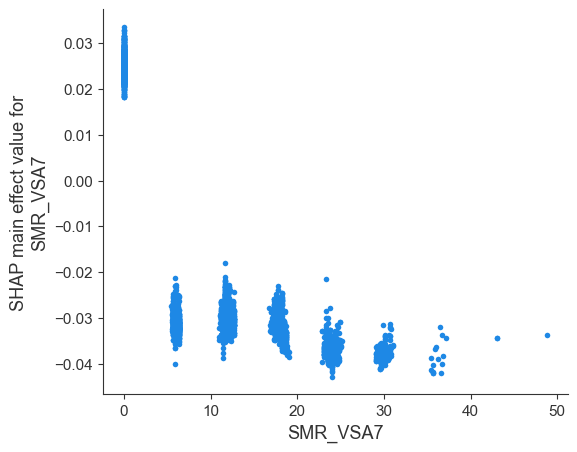

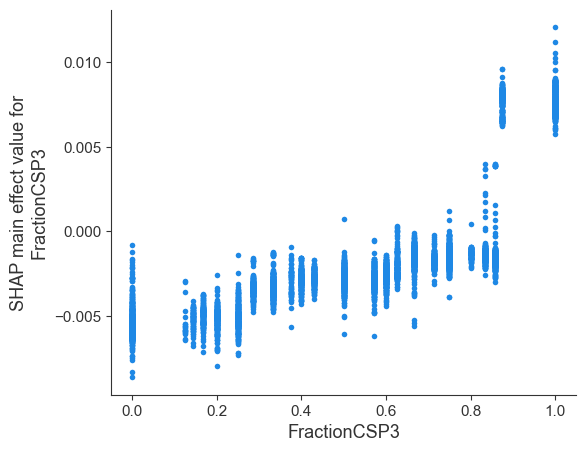

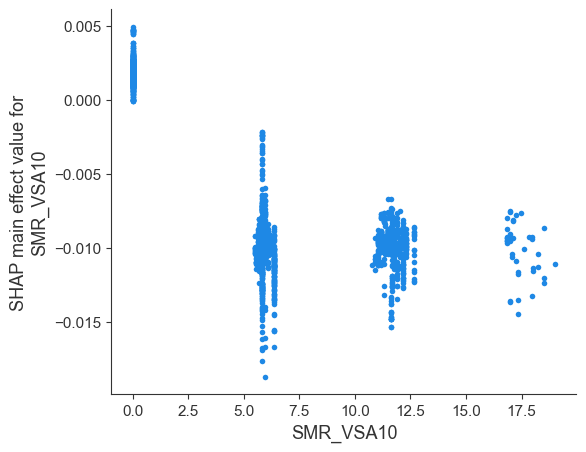

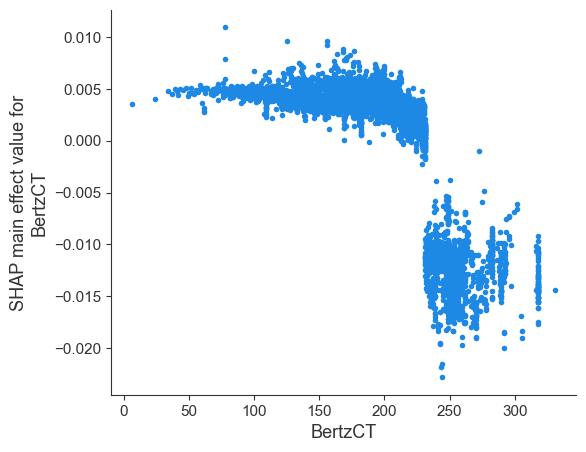

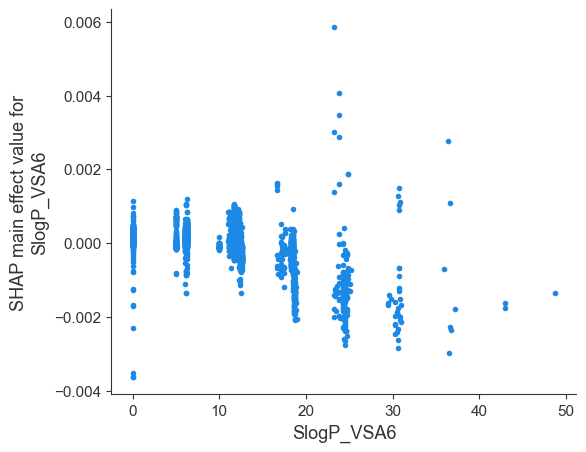

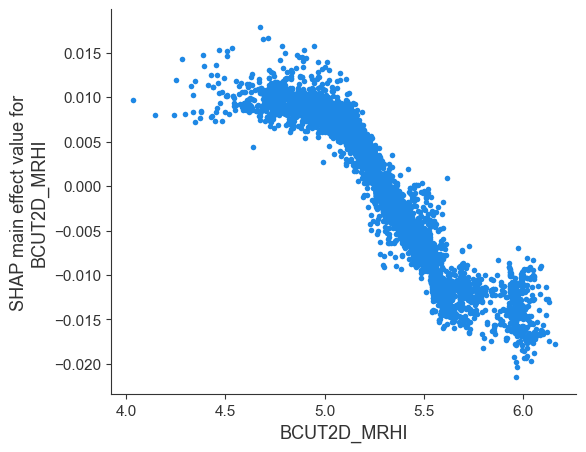

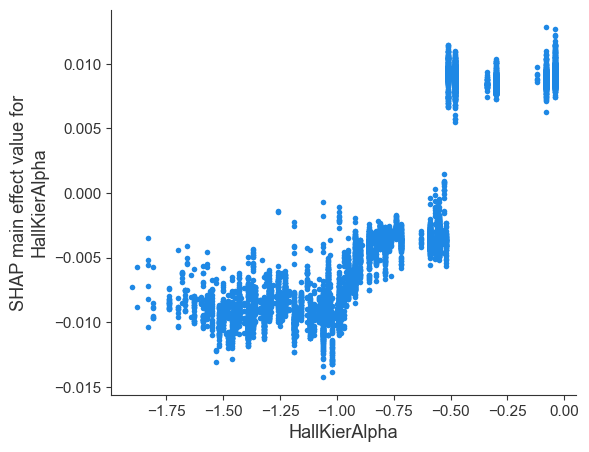

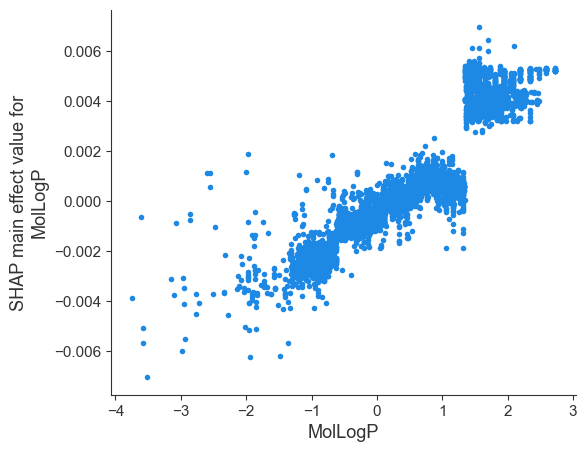

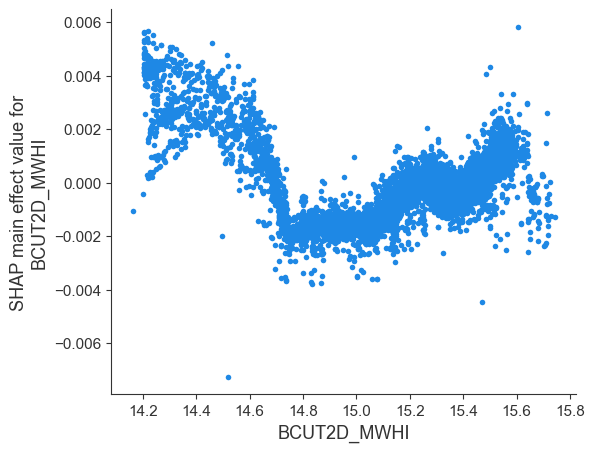

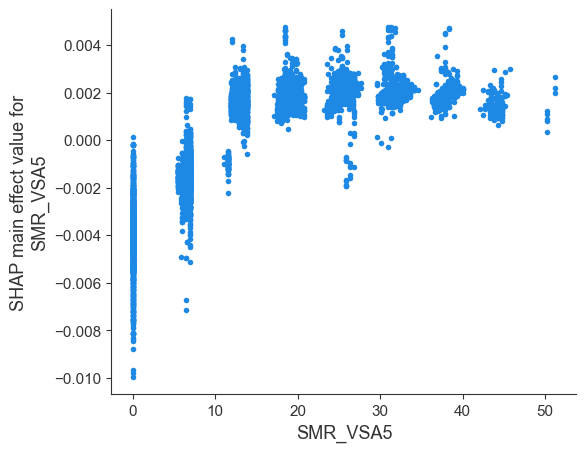

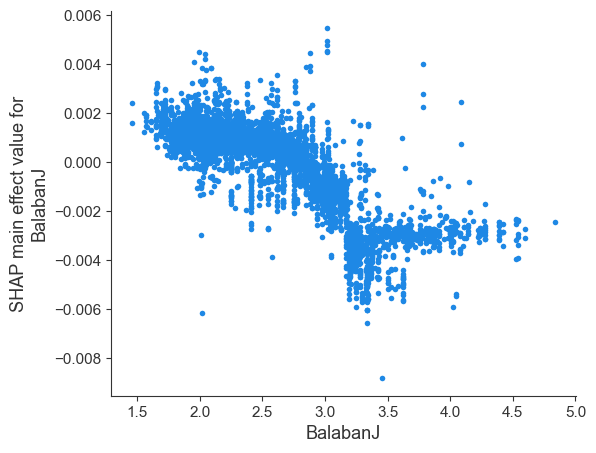

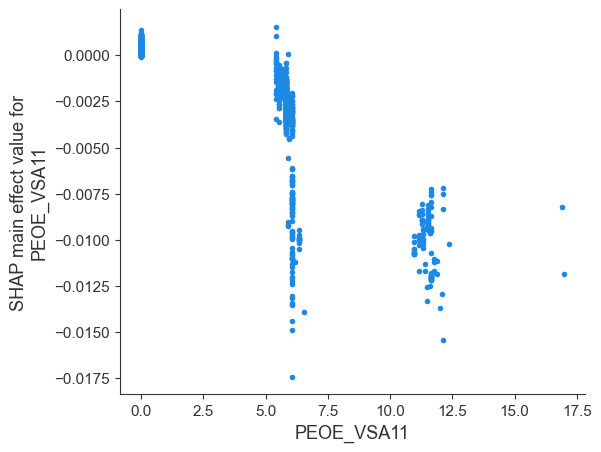

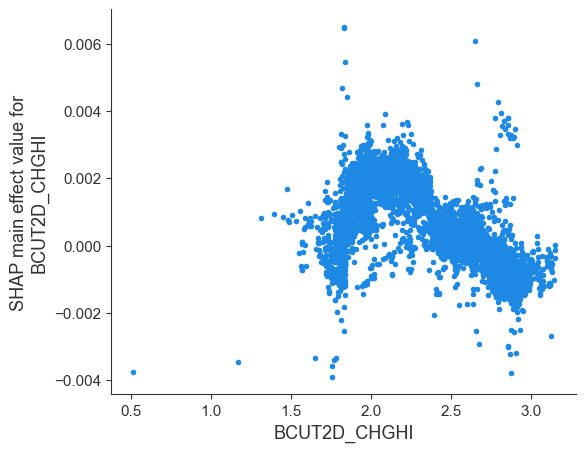

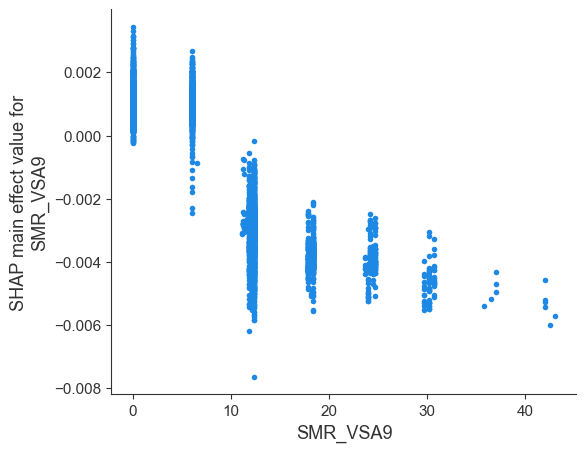

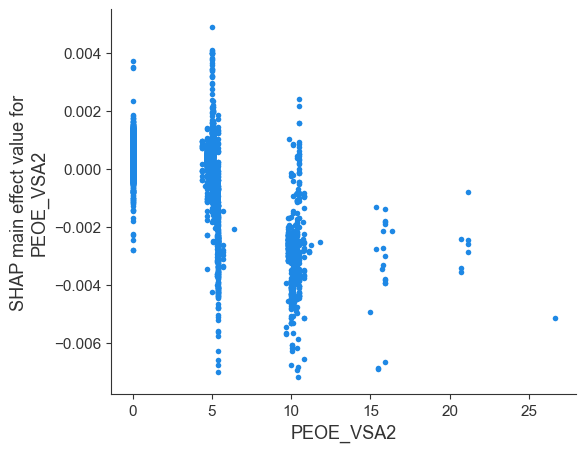

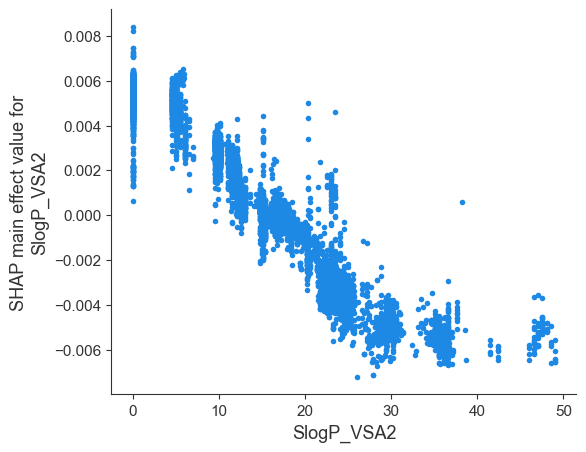

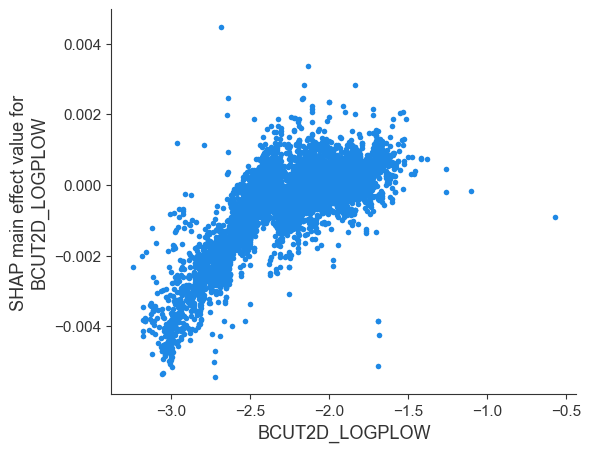

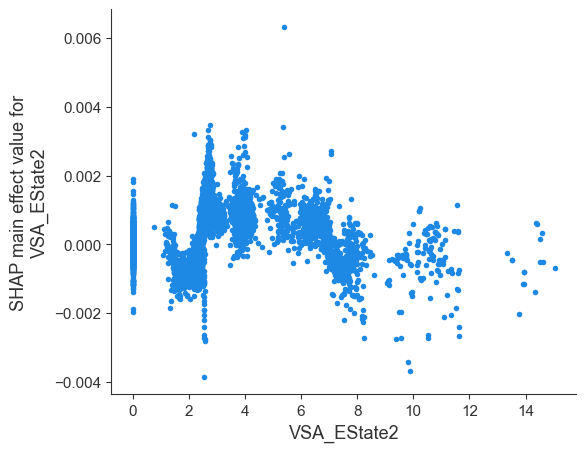

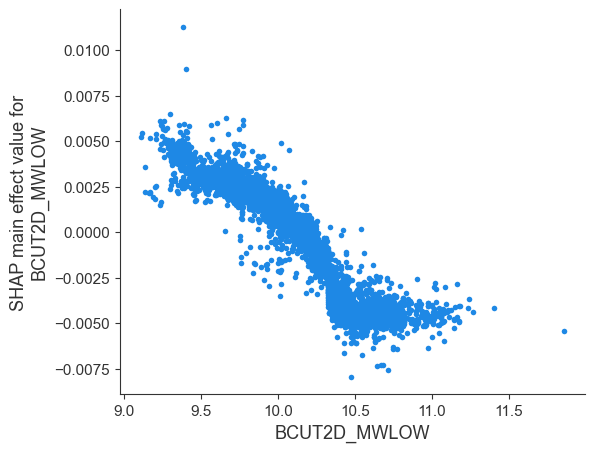

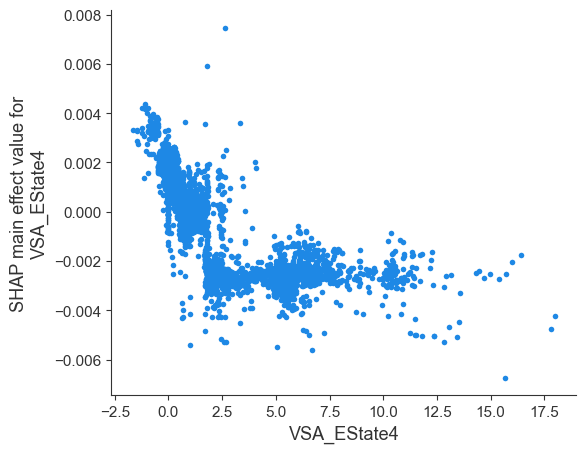

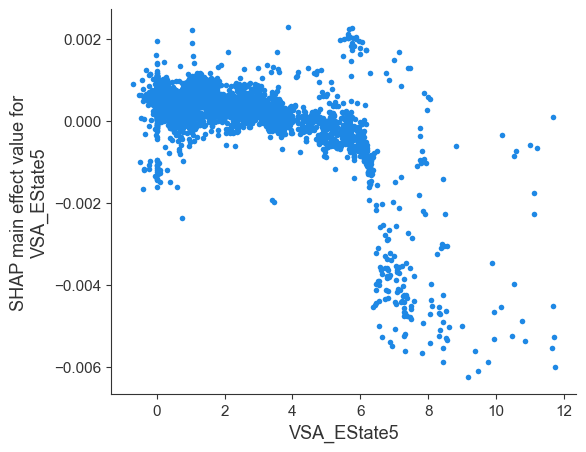

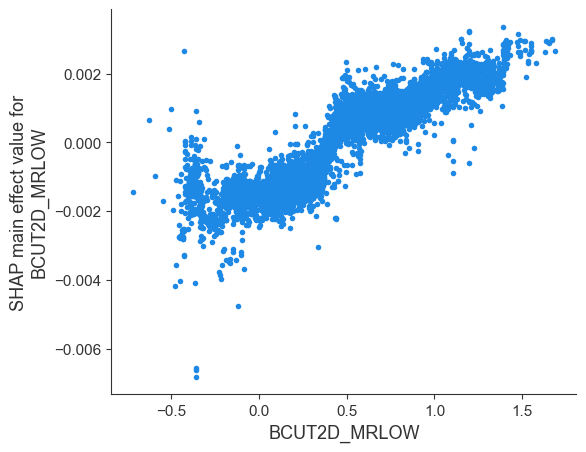

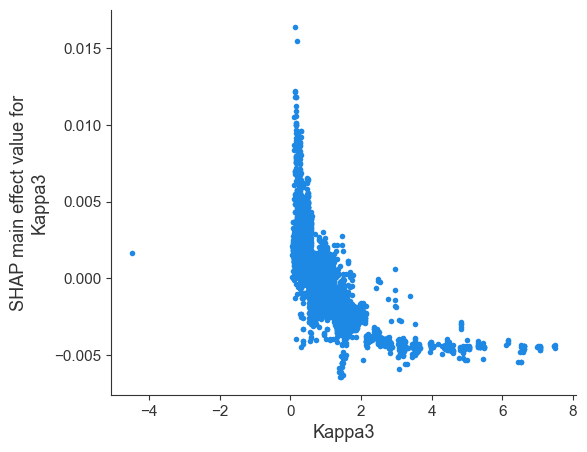

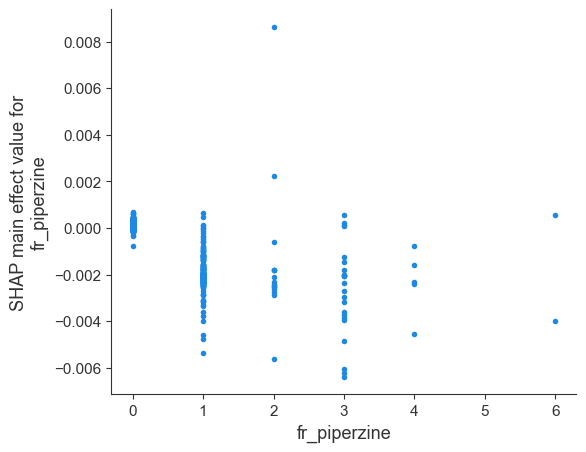

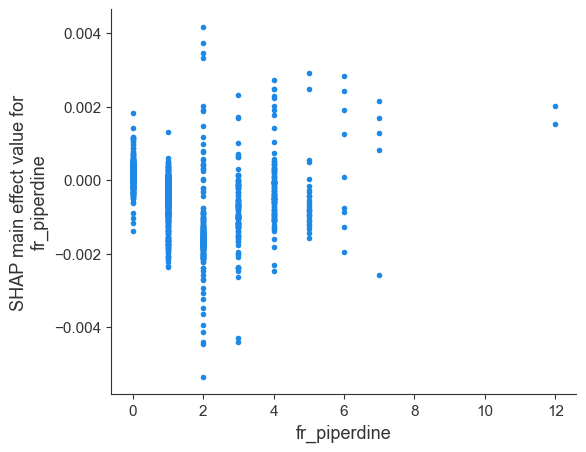

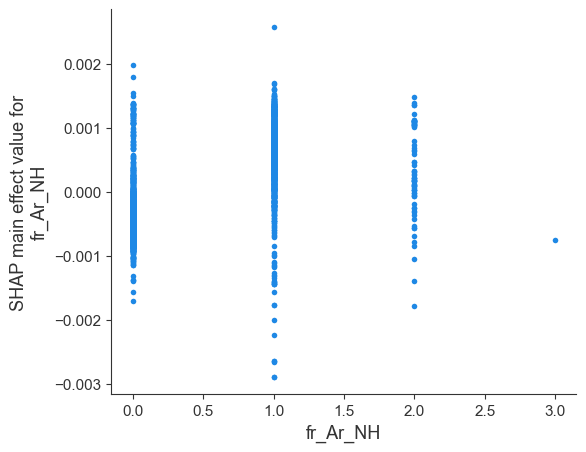

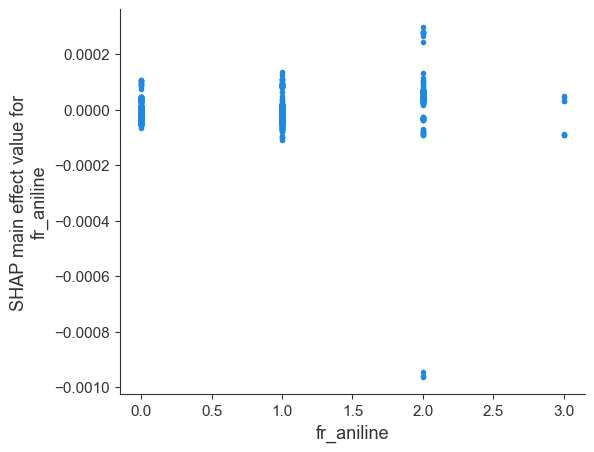

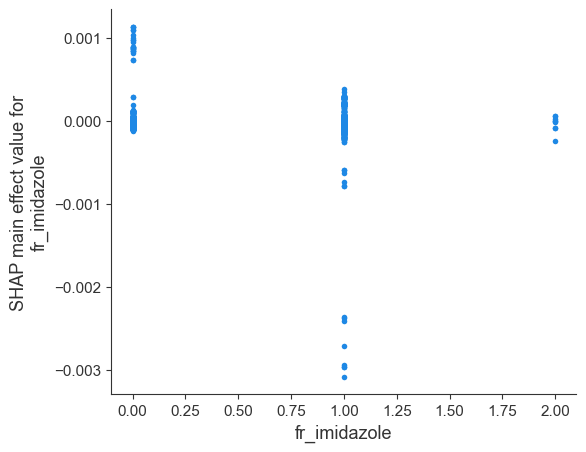

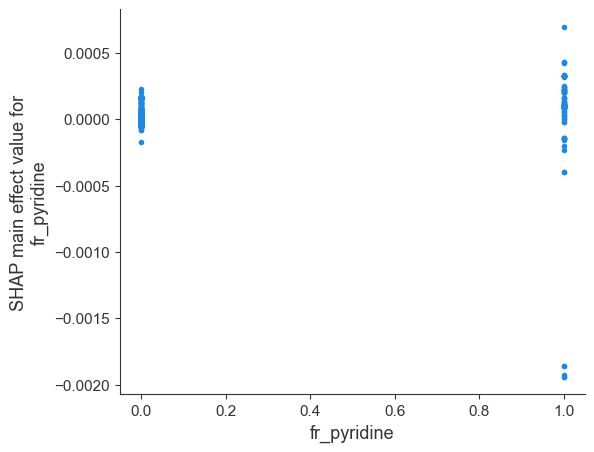

In [15]:
feature_names
for feature_name in feature_names:
    feature_index = feature_names.index(feature_name)
    shap.dependence_plot((feature_name,feature_name),shap_interaction_values, x_train)
    #plt.savefig(f'E:/optmodel/SHAP/{feature_name}_dependence_plot.tif', format='tif', dpi=600)
    plt.show()
    